Số keypoint: 21
Keypoints: [[ 4.96157944e-01  8.51954103e-01  7.04709009e-07]
 [ 6.56010270e-01  7.76323438e-01 -6.04725629e-02]
 [ 7.32188702e-01  6.23052835e-01 -5.80338687e-02]
 [ 6.95560932e-01  4.98439848e-01 -5.31394444e-02]
 [ 5.75244308e-01  4.90169853e-01 -4.65747751e-02]
 [ 6.12522066e-01  4.83869791e-01  2.51312181e-02]
 [ 6.17311895e-01  3.57025981e-01  1.30400360e-02]
 [ 6.11609757e-01  2.82545686e-01 -1.45726325e-02]
 [ 6.05147183e-01  2.15210378e-01 -4.15640920e-02]
 [ 5.16657412e-01  4.76157129e-01  2.67569162e-02]
 [ 5.17705977e-01  3.37326914e-01  1.89999547e-02]
 [ 5.20617366e-01  2.48983622e-01 -7.90572260e-03]
 [ 5.19589305e-01  1.71719491e-01 -3.19995023e-02]
 [ 4.33077633e-01  4.94753242e-01  1.51980361e-02]
 [ 4.30281460e-01  3.64235312e-01 -1.51440082e-03]
 [ 4.39297497e-01  2.81450391e-01 -2.77935006e-02]
 [ 4.41415668e-01  2.11050570e-01 -4.90694046e-02]
 [ 3.42856526e-01  5.32330275e-01 -5.57336770e-03]
 [ 3.39464247e-01  4.28268641e-01 -2.55300403e-02]
 [ 3

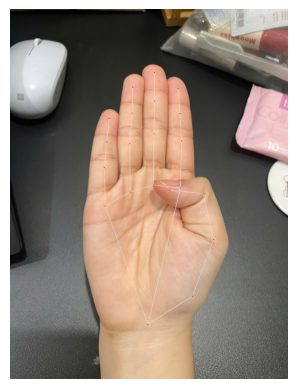

In [1]:
import cv2
import mediapipe as mp
import numpy as np
import os


# Khởi tạo model bàn tay
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.7)
mp_drawing = mp.solutions.drawing_utils

# Thư mục chứa ảnh
image_path = r"D:\NLP_VSL\demo\z6769126909473_ae76b8cb73193532f1d3daefd2bb8e75.jpg"  # ảnh thử nghiệm

# Đọc và xử lý ảnh
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = hands.process(image_rgb)

if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        # Vẽ keypoints lên ảnh để kiểm tra
        mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        # Lưu keypoints
        keypoints = []
        for lm in hand_landmarks.landmark:
            keypoints.append([lm.x, lm.y, lm.z])  # tọa độ normalized

        keypoints = np.array(keypoints)
        print("Số keypoint:", keypoints.shape[0])
        print("Keypoints:", keypoints)
else:
    print("Không phát hiện bàn tay.")

# Hiển thị ảnh có vẽ keypoints
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



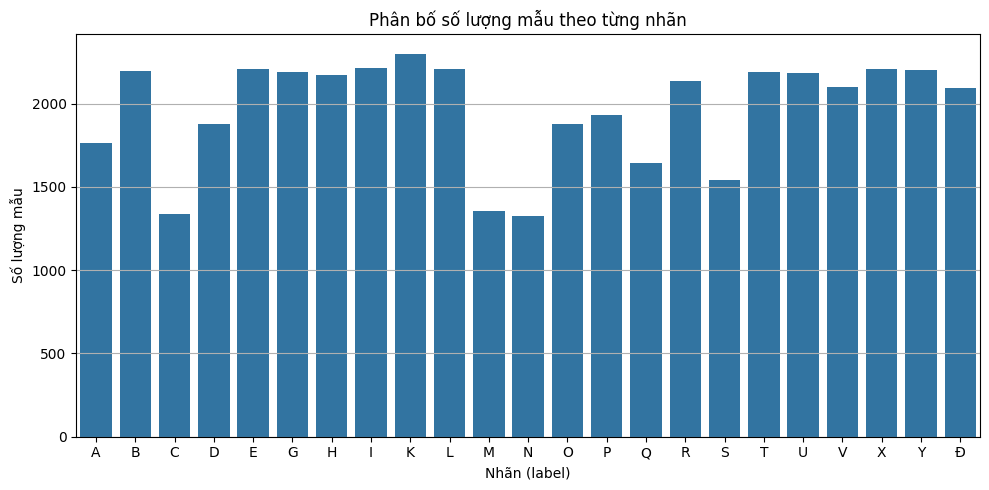

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV đã trích xuất keypoint
df = pd.read_csv(r"D:\NLP_VSL\hand_keypoints_dataset_total.csv")
# Gợi ý 1: Kiểm tra phân bố số lượng mẫu theo từng nhãn
from matplotlib import pyplot as plt


label_counts = df['label'].value_counts().sort_index()

# Vẽ biểu đồ phân bố số lượng mẫu
plt.figure(figsize=(10, 5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Phân bố số lượng mẫu theo từng nhãn')
plt.xlabel('Nhãn (label)')
plt.ylabel('Số lượng mẫu')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler



print("Số mẫu:", len(df))
print("Các nhãn lớp:", df['label'].unique())

# Tách nhãn và đặc trưng
X = df.drop('label', axis=1).values  # 63 đặc trưng (x0, y0, z0,...)
y = df['label'].values

# Mã hóa nhãn từ A,B,C,... thành số
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# --- Lưu encoder để dự đoán sau này ---
os.makedirs("saved_model", exist_ok=True)
joblib.dump(label_encoder, "saved_model/label_encoder.pkl")



Số mẫu: 45264
Các nhãn lớp: ['A' 'B' 'C' 'D' 'E' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T'
 'U' 'V' 'X' 'Y' 'Đ']


['saved_model/label_encoder.pkl']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    shuffle=True,
    random_state=42
)

In [5]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# joblib.dump(scaler, "saved_model/scaler.pkl")

In [6]:
print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (36211, 63)
Test: (9053, 63)


In [7]:
def class_distribution(y, title):
    unique, counts = np.unique(y, return_counts=True)
    print(f"\n Phân bố lớp ({title}):")
    for label_id, count in zip(unique, counts):
        label = label_encoder.inverse_transform([label_id])[0]
        print(f" - {label}: {count} mẫu")

class_distribution(y_train, "Train")



 Phân bố lớp (Train):
 - A: 1409 mẫu
 - B: 1756 mẫu
 - C: 1071 mẫu
 - D: 1503 mẫu
 - E: 1767 mẫu
 - G: 1754 mẫu
 - H: 1737 mẫu
 - I: 1771 mẫu
 - K: 1841 mẫu
 - L: 1769 mẫu
 - M: 1086 mẫu
 - N: 1059 mẫu
 - O: 1505 mẫu
 - P: 1545 mẫu
 - Q: 1313 mẫu
 - R: 1711 mẫu
 - S: 1235 mẫu
 - T: 1751 mẫu
 - U: 1750 mẫu
 - V: 1679 mẫu
 - X: 1765 mẫu
 - Y: 1760 mẫu
 - Đ: 1674 mẫu


In [8]:
class_distribution(y_test, "Test")


 Phân bố lớp (Test):
 - A: 352 mẫu
 - B: 439 mẫu
 - C: 268 mẫu
 - D: 376 mẫu
 - E: 442 mẫu
 - G: 439 mẫu
 - H: 434 mẫu
 - I: 443 mẫu
 - K: 460 mẫu
 - L: 442 mẫu
 - M: 272 mẫu
 - N: 265 mẫu
 - O: 376 mẫu
 - P: 386 mẫu
 - Q: 328 mẫu
 - R: 428 mẫu
 - S: 309 mẫu
 - T: 438 mẫu
 - U: 437 mẫu
 - V: 420 mẫu
 - X: 441 mẫu
 - Y: 440 mẫu
 - Đ: 418 mẫu


In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

import os
# Số lớp = số ký hiệu tay bạn có
num_classes = len(np.unique(y_train))

# Nếu nhãn là số → chuyển thành one-hot
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)



# === MÔ HÌNH MLP ===

model = Sequential([
    Dense(256, activation='relu', input_shape=(63,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


save_dir = os.path.join("saved_model")
os.makedirs(save_dir, exist_ok=True)
model_path = os.path.join(save_dir, "best_model.h5")


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath=model_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False, 
    verbose=1
)
# === BƯỚC 9: HUẤN LUYỆN ===
history = model.fit(
    X_train, y_train_cat,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test_cat),
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)



Epoch 1/100


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


562/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0816 - loss: 3.0834
Epoch 1: val_loss improved from inf to 2.56782, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0820 - loss: 3.0824 - val_accuracy: 0.4619 - val_loss: 2.5678
Epoch 2/100
543/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2485 - loss: 2.5380
Epoch 2: val_loss improved from 2.56782 to 1.81493, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2502 - loss: 2.5313 - val_accuracy: 0.6500 - val_loss: 1.8149
Epoch 3/100
555/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3815 - loss: 1.9696
Epoch 3: val_loss improved from 1.81493 to 1.32804, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3821 - loss: 1.9675 - val_accuracy: 0.7390 - val_loss: 1.3280
Epoch 4/100
566/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4799 - loss: 1.5902
Epoch 4: val_loss improved from 1.32804 to 1.02924, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4799 - loss: 1.5901 - val_accuracy: 0.8019 - val_loss: 1.0292
Epoch 5/100
534/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5417 - loss: 1.3550
Epoch 5: val_loss improved from 1.02924 to 0.83789, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5426 - loss: 1.3519 - val_accuracy: 0.8233 - val_loss: 0.8379
Epoch 6/100
544/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5887 - loss: 1.1756
Epoch 6: val_loss improved from 0.83789 to 0.72335, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5891 - loss: 1.1742 - val_accuracy: 0.8545 - val_loss: 0.7234
Epoch 7/100
557/566 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6328 - loss: 1.0431
Epoch 7: val_loss improved from 0.72335 to 0.63759, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6328 - loss: 1.0428 - val_accuracy: 0.8653 - val_loss: 0.6376
Epoch 8/100
560/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6654 - loss: 0.9482
Epoch 8: val_loss improved from 0.63759 to 0.56515, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6654 - loss: 0.9479 - val_accuracy: 0.8900 - val_loss: 0.5651
Epoch 9/100
529/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6890 - loss: 0.8596
Epoch 9: val_loss improved from 0.56515 to 0.51128, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6895 - loss: 0.8587 - val_accuracy: 0.9020 - val_loss: 0.5113
Epoch 10/100
536/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7148 - loss: 0.8020
Epoch 10: val_loss improved from 0.51128 to 0.46780, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7152 - loss: 0.8011 - val_accuracy: 0.9024 - val_loss: 0.4678
Epoch 11/100
559/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7446 - loss: 0.7359
Epoch 11: val_loss improved from 0.46780 to 0.42756, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7446 - loss: 0.7358 - val_accuracy: 0.9128 - val_loss: 0.4276
Epoch 12/100
526/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7560 - loss: 0.6870
Epoch 12: val_loss improved from 0.42756 to 0.39409, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7563 - loss: 0.6865 - val_accuracy: 0.9164 - val_loss: 0.3941
Epoch 13/100
526/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7759 - loss: 0.6474
Epoch 13: val_loss improved from 0.39409 to 0.36425, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7760 - loss: 0.6466 - val_accuracy: 0.9275 - val_loss: 0.3642
Epoch 14/100
555/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7880 - loss: 0.6108
Epoch 14: val_loss improved from 0.36425 to 0.33501, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7881 - loss: 0.6106 - val_accuracy: 0.9302 - val_loss: 0.3350
Epoch 15/100
565/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8061 - loss: 0.5651
Epoch 15: val_loss improved from 0.33501 to 0.30874, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8061 - loss: 0.5651 - val_accuracy: 0.9345 - val_loss: 0.3087
Epoch 16/100
555/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8171 - loss: 0.5397
Epoch 16: val_loss improved from 0.30874 to 0.28864, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8172 - loss: 0.5395 - val_accuracy: 0.9363 - val_loss: 0.2886
Epoch 17/100
565/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8247 - loss: 0.5167
Epoch 17: val_loss improved from 0.28864 to 0.27027, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8247 - loss: 0.5166 - val_accuracy: 0.9427 - val_loss: 0.2703
Epoch 18/100
538/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8289 - loss: 0.4966
Epoch 18: val_loss improved from 0.27027 to 0.25272, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8293 - loss: 0.4959 - val_accuracy: 0.9479 - val_loss: 0.2527
Epoch 19/100
563/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8473 - loss: 0.4537
Epoch 19: val_loss improved from 0.25272 to 0.23297, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8473 - loss: 0.4537 - val_accuracy: 0.9505 - val_loss: 0.2330
Epoch 20/100
554/566 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8550 - loss: 0.4340
Epoch 20: val_loss improved from 0.23297 to 0.21926, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8550 - loss: 0.4339 - val_accuracy: 0.9532 - val_loss: 0.2193
Epoch 21/100
554/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8583 - loss: 0.4230
Epoch 21: val_loss improved from 0.21926 to 0.20560, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8584 - loss: 0.4229 - val_accuracy: 0.9560 - val_loss: 0.2056
Epoch 22/100
544/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8682 - loss: 0.3973
Epoch 22: val_loss improved from 0.20560 to 0.19341, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8682 - loss: 0.3973 - val_accuracy: 0.9594 - val_loss: 0.1934
Epoch 23/100
530/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8746 - loss: 0.3823
Epoch 23: val_loss improved from 0.19341 to 0.18130, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8749 - loss: 0.3818 - val_accuracy: 0.9618 - val_loss: 0.1813
Epoch 24/100
554/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8785 - loss: 0.3721
Epoch 24: val_loss improved from 0.18130 to 0.17362, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8786 - loss: 0.3720 - val_accuracy: 0.9640 - val_loss: 0.1736
Epoch 25/100
565/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8912 - loss: 0.3490
Epoch 25: val_loss improved from 0.17362 to 0.16265, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8912 - loss: 0.3490 - val_accuracy: 0.9672 - val_loss: 0.1626
Epoch 26/100
543/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8895 - loss: 0.3492
Epoch 26: val_loss improved from 0.16265 to 0.15384, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8896 - loss: 0.3486 - val_accuracy: 0.9698 - val_loss: 0.1538
Epoch 27/100
563/566 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8954 - loss: 0.3268
Epoch 27: val_loss improved from 0.15384 to 0.14800, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8954 - loss: 0.3268 - val_accuracy: 0.9712 - val_loss: 0.1480
Epoch 28/100
539/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8992 - loss: 0.3122
Epoch 28: val_loss improved from 0.14800 to 0.14216, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8993 - loss: 0.3123 - val_accuracy: 0.9739 - val_loss: 0.1422
Epoch 29/100
550/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9061 - loss: 0.2999
Epoch 29: val_loss improved from 0.14216 to 0.13630, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9061 - loss: 0.2999 - val_accuracy: 0.9742 - val_loss: 0.1363
Epoch 30/100
545/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9092 - loss: 0.2906
Epoch 30: val_loss improved from 0.13630 to 0.12826, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9092 - loss: 0.2906 - val_accuracy: 0.9757 - val_loss: 0.1283
Epoch 31/100
534/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9111 - loss: 0.2831
Epoch 31: val_loss improved from 0.12826 to 0.12118, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9113 - loss: 0.2826 - val_accuracy: 0.9776 - val_loss: 0.1212
Epoch 32/100
547/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9199 - loss: 0.2663
Epoch 32: val_loss improved from 0.12118 to 0.11493, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9199 - loss: 0.2663 - val_accuracy: 0.9788 - val_loss: 0.1149
Epoch 33/100
527/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9206 - loss: 0.2574
Epoch 33: val_loss improved from 0.11493 to 0.11250, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9206 - loss: 0.2576 - val_accuracy: 0.9786 - val_loss: 0.1125
Epoch 34/100
543/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9202 - loss: 0.2561
Epoch 34: val_loss improved from 0.11250 to 0.10812, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9202 - loss: 0.2559 - val_accuracy: 0.9788 - val_loss: 0.1081
Epoch 35/100
540/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9257 - loss: 0.2442
Epoch 35: val_loss improved from 0.10812 to 0.10490, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9256 - loss: 0.2442 - val_accuracy: 0.9788 - val_loss: 0.1049
Epoch 36/100
553/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9264 - loss: 0.2385
Epoch 36: val_loss improved from 0.10490 to 0.09758, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9264 - loss: 0.2384 - val_accuracy: 0.9808 - val_loss: 0.0976
Epoch 37/100
552/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9295 - loss: 0.2303
Epoch 37: val_loss improved from 0.09758 to 0.09590, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9295 - loss: 0.2304 - val_accuracy: 0.9818 - val_loss: 0.0959
Epoch 38/100
561/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9329 - loss: 0.2266
Epoch 38: val_loss improved from 0.09590 to 0.09143, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9329 - loss: 0.2265 - val_accuracy: 0.9825 - val_loss: 0.0914
Epoch 39/100
558/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9325 - loss: 0.2166
Epoch 39: val_loss improved from 0.09143 to 0.08853, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9325 - loss: 0.2165 - val_accuracy: 0.9820 - val_loss: 0.0885
Epoch 40/100
546/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9360 - loss: 0.2114
Epoch 40: val_loss improved from 0.08853 to 0.08518, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9361 - loss: 0.2114 - val_accuracy: 0.9829 - val_loss: 0.0852
Epoch 41/100
528/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9361 - loss: 0.2149
Epoch 41: val_loss improved from 0.08518 to 0.08121, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9363 - loss: 0.2143 - val_accuracy: 0.9834 - val_loss: 0.0812
Epoch 42/100
542/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9406 - loss: 0.2008
Epoch 42: val_loss improved from 0.08121 to 0.07832, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9406 - loss: 0.2008 - val_accuracy: 0.9832 - val_loss: 0.0783
Epoch 43/100
525/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9434 - loss: 0.1921
Epoch 43: val_loss improved from 0.07832 to 0.07670, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9434 - loss: 0.1921 - val_accuracy: 0.9844 - val_loss: 0.0767
Epoch 44/100
541/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9421 - loss: 0.1925
Epoch 44: val_loss improved from 0.07670 to 0.07445, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9422 - loss: 0.1924 - val_accuracy: 0.9849 - val_loss: 0.0745
Epoch 45/100
554/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9438 - loss: 0.1882
Epoch 45: val_loss improved from 0.07445 to 0.07241, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9438 - loss: 0.1881 - val_accuracy: 0.9852 - val_loss: 0.0724
Epoch 46/100
531/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9487 - loss: 0.1779
Epoch 46: val_loss improved from 0.07241 to 0.07103, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9486 - loss: 0.1782 - val_accuracy: 0.9844 - val_loss: 0.0710
Epoch 47/100
526/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9463 - loss: 0.1815
Epoch 47: val_loss improved from 0.07103 to 0.06847, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9464 - loss: 0.1814 - val_accuracy: 0.9864 - val_loss: 0.0685
Epoch 48/100
532/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9486 - loss: 0.1774
Epoch 48: val_loss improved from 0.06847 to 0.06743, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9486 - loss: 0.1771 - val_accuracy: 0.9858 - val_loss: 0.0674
Epoch 49/100
530/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9486 - loss: 0.1733
Epoch 49: val_loss improved from 0.06743 to 0.06453, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9487 - loss: 0.1730 - val_accuracy: 0.9864 - val_loss: 0.0645
Epoch 50/100
556/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9518 - loss: 0.1651
Epoch 50: val_loss improved from 0.06453 to 0.06348, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9518 - loss: 0.1652 - val_accuracy: 0.9877 - val_loss: 0.0635
Epoch 51/100
529/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9528 - loss: 0.1677
Epoch 51: val_loss improved from 0.06348 to 0.06179, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9528 - loss: 0.1676 - val_accuracy: 0.9866 - val_loss: 0.0618
Epoch 52/100
529/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9546 - loss: 0.1585
Epoch 52: val_loss improved from 0.06179 to 0.05957, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9545 - loss: 0.1586 - val_accuracy: 0.9872 - val_loss: 0.0596
Epoch 53/100
526/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9506 - loss: 0.1693
Epoch 53: val_loss improved from 0.05957 to 0.05821, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9507 - loss: 0.1687 - val_accuracy: 0.9881 - val_loss: 0.0582
Epoch 54/100
555/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9532 - loss: 0.1573
Epoch 54: val_loss improved from 0.05821 to 0.05666, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9532 - loss: 0.1573 - val_accuracy: 0.9891 - val_loss: 0.0567
Epoch 55/100
527/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9573 - loss: 0.1525
Epoch 55: val_loss improved from 0.05666 to 0.05532, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9573 - loss: 0.1523 - val_accuracy: 0.9891 - val_loss: 0.0553
Epoch 56/100
560/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9560 - loss: 0.1535
Epoch 56: val_loss improved from 0.05532 to 0.05360, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9560 - loss: 0.1534 - val_accuracy: 0.9891 - val_loss: 0.0536
Epoch 57/100
527/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9565 - loss: 0.1492
Epoch 57: val_loss improved from 0.05360 to 0.05232, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9565 - loss: 0.1490 - val_accuracy: 0.9892 - val_loss: 0.0523
Epoch 58/100
558/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9581 - loss: 0.1467
Epoch 58: val_loss improved from 0.05232 to 0.05151, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9581 - loss: 0.1467 - val_accuracy: 0.9888 - val_loss: 0.0515
Epoch 59/100
561/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9599 - loss: 0.1390
Epoch 59: val_loss improved from 0.05151 to 0.05021, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9599 - loss: 0.1390 - val_accuracy: 0.9896 - val_loss: 0.0502
Epoch 60/100
566/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9605 - loss: 0.1372
Epoch 60: val_loss improved from 0.05021 to 0.04931, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9605 - loss: 0.1372 - val_accuracy: 0.9901 - val_loss: 0.0493
Epoch 61/100
559/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9603 - loss: 0.1383
Epoch 61: val_loss improved from 0.04931 to 0.04910, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9603 - loss: 0.1383 - val_accuracy: 0.9890 - val_loss: 0.0491
Epoch 62/100
550/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9623 - loss: 0.1329
Epoch 62: val_loss improved from 0.04910 to 0.04702, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9623 - loss: 0.1330 - val_accuracy: 0.9894 - val_loss: 0.0470
Epoch 63/100
537/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9621 - loss: 0.1309
Epoch 63: val_loss did not improve from 0.04702
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1309 - val_accuracy: 0.9898 - val_loss: 0.0478
Epoch 64/100
550/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9632 - loss: 0.1305
Epoch 64: val_loss improved from 0.04702 to 0.04572, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9632 - loss: 0.1304 - val_accuracy: 0.9901 - val_loss: 0.0457
Epoch 65/100
553/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9649 - loss: 0.1259
Epoch 65: val_loss improved from 0.04572 to 0.04425, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9649 - loss: 0.1259 - val_accuracy: 0.9903 - val_loss: 0.0442
Epoch 66/100
556/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9643 - loss: 0.1286
Epoch 66: val_loss improved from 0.04425 to 0.04402, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9643 - loss: 0.1285 - val_accuracy: 0.9904 - val_loss: 0.0440
Epoch 67/100
563/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9648 - loss: 0.1264
Epoch 67: val_loss improved from 0.04402 to 0.04321, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9648 - loss: 0.1264 - val_accuracy: 0.9905 - val_loss: 0.0432
Epoch 68/100
544/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9643 - loss: 0.1218
Epoch 68: val_loss improved from 0.04321 to 0.04271, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9644 - loss: 0.1218 - val_accuracy: 0.9908 - val_loss: 0.0427
Epoch 69/100
531/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9668 - loss: 0.1207
Epoch 69: val_loss improved from 0.04271 to 0.04114, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9667 - loss: 0.1208 - val_accuracy: 0.9909 - val_loss: 0.0411
Epoch 70/100
566/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9647 - loss: 0.1215
Epoch 70: val_loss did not improve from 0.04114
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9647 - loss: 0.1215 - val_accuracy: 0.9911 - val_loss: 0.0416
Epoch 71/100
529/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9652 - loss: 0.1173
Epoch 71: val_loss improved from 0.04114 to 0.04003, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9653 - loss: 0.1172 - val_accuracy: 0.9914 - val_loss: 0.0400
Epoch 72/100
531/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9678 - loss: 0.1156
Epoch 72: val_loss improved from 0.04003 to 0.03998, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9678 - loss: 0.1156 - val_accuracy: 0.9912 - val_loss: 0.0400
Epoch 73/100
560/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.1100
Epoch 73: val_loss improved from 0.03998 to 0.03903, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1100 - val_accuracy: 0.9914 - val_loss: 0.0390
Epoch 74/100
544/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9688 - loss: 0.1124
Epoch 74: val_loss did not improve from 0.03903
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1124 - val_accuracy: 0.9916 - val_loss: 0.0397
Epoch 75/100
545/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9684 - loss: 0.1107
Epoch 75: val_loss improved from 0.03903 to 0.03740, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9684 - loss: 0.1108 - val_accuracy: 0.9916 - val_loss: 0.0374
Epoch 76/100
536/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9666 - loss: 0.1158
Epoch 76: val_loss did not improve from 0.03740
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9667 - loss: 0.1156 - val_accuracy: 0.9917 - val_loss: 0.0379
Epoch 77/100
537/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9684 - loss: 0.1106
Epoch 77: val_loss improved from 0.03740 to 0.03658, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9685 - loss: 0.1105 - val_accuracy: 0.9916 - val_loss: 0.0366
Epoch 78/100
532/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9693 - loss: 0.1102
Epoch 78: val_loss improved from 0.03658 to 0.03562, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9693 - loss: 0.1100 - val_accuracy: 0.9923 - val_loss: 0.0356
Epoch 79/100
533/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9707 - loss: 0.1043
Epoch 79: val_loss did not improve from 0.03562
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9706 - loss: 0.1044 - val_accuracy: 0.9920 - val_loss: 0.0358
Epoch 80/100
547/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9698 - loss: 0.1076
Epoch 80: val_loss did not improve from 0.03562
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9698 - loss: 0.1075 - val_accuracy: 0.9917 - val_loss: 0.0360
Epoch 81/100
555/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9712 - loss: 0.1050
Epoch 81: val_loss improved from 0.03562 to 0.03458, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9712 - loss: 0.1049 - val_accuracy: 0.9918 - val_loss: 0.0346
Epoch 82/100
549/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9724 - loss: 0.0961
Epoch 82: val_loss improved from 0.03458 to 0.03454, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0963 - val_accuracy: 0.9925 - val_loss: 0.0345
Epoch 83/100
564/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9709 - loss: 0.1006
Epoch 83: val_loss improved from 0.03454 to 0.03440, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.1007 - val_accuracy: 0.9917 - val_loss: 0.0344
Epoch 84/100
554/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9720 - loss: 0.0994
Epoch 84: val_loss improved from 0.03440 to 0.03349, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0994 - val_accuracy: 0.9925 - val_loss: 0.0335
Epoch 85/100
562/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9720 - loss: 0.0984
Epoch 85: val_loss improved from 0.03349 to 0.03302, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0984 - val_accuracy: 0.9925 - val_loss: 0.0330
Epoch 86/100
556/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9699 - loss: 0.1019
Epoch 86: val_loss improved from 0.03302 to 0.03263, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9700 - loss: 0.1019 - val_accuracy: 0.9927 - val_loss: 0.0326
Epoch 87/100
544/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9717 - loss: 0.0962
Epoch 87: val_loss improved from 0.03263 to 0.03244, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.0962 - val_accuracy: 0.9926 - val_loss: 0.0324
Epoch 88/100
563/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9732 - loss: 0.0984
Epoch 88: val_loss did not improve from 0.03244
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0984 - val_accuracy: 0.9923 - val_loss: 0.0328
Epoch 89/100
534/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9732 - loss: 0.0931
Epoch 89: val_loss improved from 0.03244 to 0.03184, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9732 - loss: 0.0932 - val_accuracy: 0.9927 - val_loss: 0.0318
Epoch 90/100
562/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9744 - loss: 0.0908
Epoch 90: val_loss improved from 0.03184 to 0.03142, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.0908 - val_accuracy: 0.9927 - val_loss: 0.0314
Epoch 91/100
563/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9738 - loss: 0.0896
Epoch 91: val_loss improved from 0.03142 to 0.03061, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0896 - val_accuracy: 0.9930 - val_loss: 0.0306
Epoch 92/100
540/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9737 - loss: 0.0915
Epoch 92: val_loss improved from 0.03061 to 0.03031, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0916 - val_accuracy: 0.9935 - val_loss: 0.0303
Epoch 93/100
545/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9749 - loss: 0.0877
Epoch 93: val_loss did not improve from 0.03031
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0878 - val_accuracy: 0.9926 - val_loss: 0.0305
Epoch 94/100
561/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9763 - loss: 0.0859
Epoch 94: val_loss improved from 0.03031 to 0.02953, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9763 - loss: 0.0859 - val_accuracy: 0.9934 - val_loss: 0.0295
Epoch 95/100
552/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9737 - loss: 0.0912
Epoch 95: val_loss did not improve from 0.02953
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0911 - val_accuracy: 0.9927 - val_loss: 0.0295
Epoch 96/100
557/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9738 - loss: 0.0872
Epoch 96: val_loss improved from 0.02953 to 0.02909, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0873 - val_accuracy: 0.9936 - val_loss: 0.0291
Epoch 97/100
536/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9751 - loss: 0.0858
Epoch 97: val_loss improved from 0.02909 to 0.02852, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0859 - val_accuracy: 0.9936 - val_loss: 0.0285
Epoch 98/100
538/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9738 - loss: 0.0900
Epoch 98: val_loss did not improve from 0.02852
566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.0898 - val_accuracy: 0.9939 - val_loss: 0.0288
Epoch 99/100
545/566 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9741 - loss: 0.0859
Epoch 99: val_loss improved from 0.02852 to 0.02846, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9742 - loss: 0.0858 - val_accuracy: 0.9936 - val_loss: 0.0285
Epoch 100/100
566/566 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9767 - loss: 0.0832
Epoch 100: val_loss improved from 0.02846 to 0.02843, saving model to saved_model\best_model.h5


566/566 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9767 - loss: 0.0832 - val_accuracy: 0.9939 - val_loss: 0.0284
Restoring model weights from the end of the best epoch: 100.


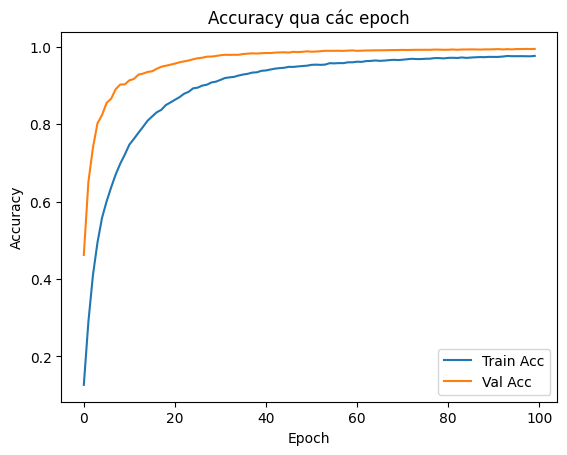

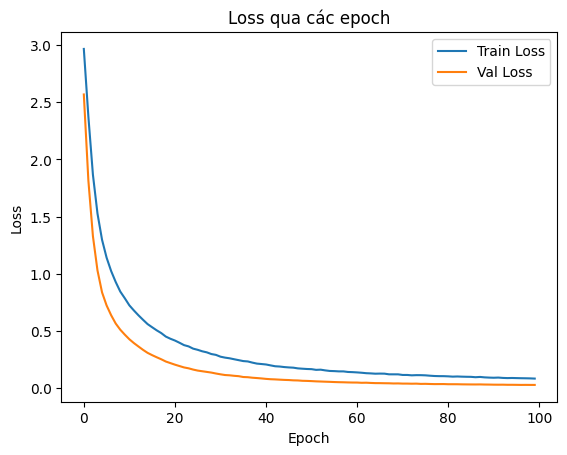

In [13]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy qua các epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss qua các epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model_report(model, X_test, y_test_onehot, label_encoder):

    # 1. Dự đoán
    y_pred_indices = np.argmax(model.predict(X_test), axis=1)
    y_true_indices = np.argmax(y_test_onehot, axis=1)

    # 2. Tên lớp gốc (A, B, C, ...)
    class_names = label_encoder.classes_

    # 3. In báo cáo phân loại
    print(" Classification Report:")
    # print(classification_report(y_true_indices, y_pred_indices, target_names=class_names))
    print(classification_report(
    y_true_indices,
    y_pred_indices,
    target_names=class_names,
    digits=4   # hiển thị 4 chữ số thập phân
))
    # 4. Vẽ confusion matrix
    cm = confusion_matrix(y_true_indices, y_pred_indices)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step
 Classification Report:
              precision    recall  f1-score   support

           A     1.0000    0.9886    0.9943       352
           B     0.9977    1.0000    0.9989       439
           C     0.9926    0.9963    0.9944       268
           D     0.9973    0.9973    0.9973       376
           E     1.0000    1.0000    1.0000       442
           G     0.9799    0.9977    0.9887       439
           H     0.9931    0.9908    0.9919       434
           I     1.0000    0.9932    0.9966       443
           K     0.9956    0.9761    0.9857       460
           L     1.0000    0.9932    0.9966       442
           M     0.9537    0.9853    0.9693       272
           N     0.9884    0.9623    0.9751       265
           O     0.9973    0.9973    0.9973       376
           P     0.9948    0.9896    0.9922       386
           Q     0.9702    0.9939    0.9819       328
           R     0.9953    0.9953    0.9953       428
           S  

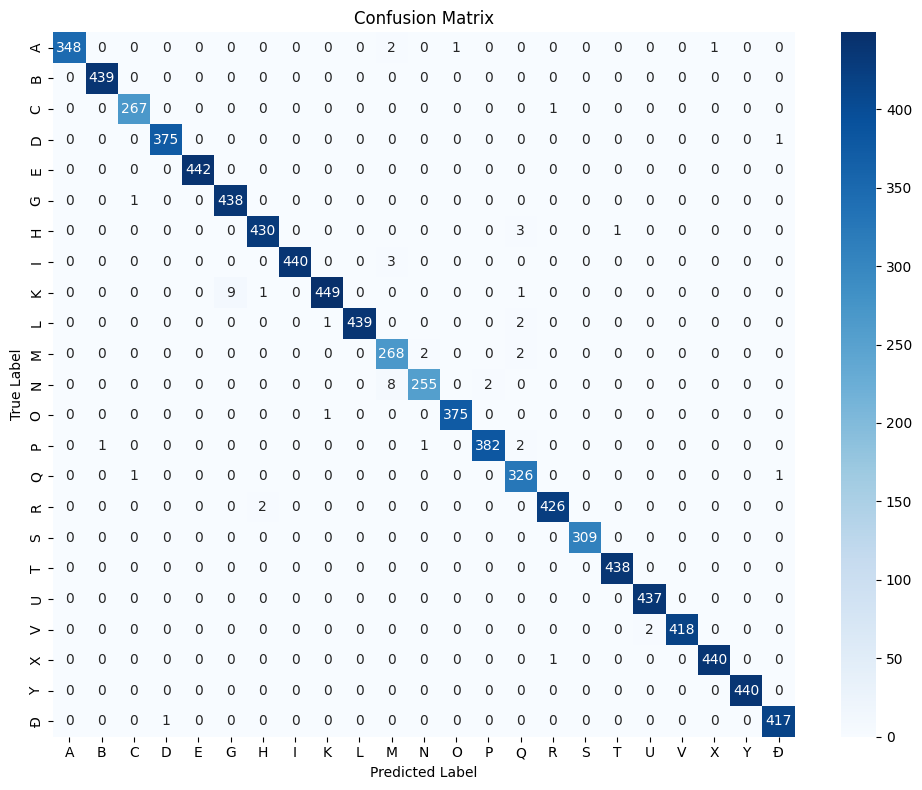

In [20]:
# Đánh giá mô hình với ma trận nhầm lẫn dạng chữ cái
evaluate_model_report(model, X_test, y_test_cat, label_encoder)


In [21]:
loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {acc:.4f}")


Test Accuracy: 0.9939


In [ ]:
# import os
# import cv2
# import numpy as np
# import mediapipe as mp
# import joblib
# import matplotlib.pyplot as plt
# from tensorflow.keras.models import load_model

# # === Load mô hình, scaler và label encoder ===
# model = load_model("saved_model/best_model.h5")
# scaler = joblib.load("saved_model/scaler.pkl")
# label_encoder = joblib.load("saved_model/label_encoder.pkl")

# # === Khởi tạo MediaPipe để phát hiện tay ===
# mp_hands = mp.solutions.hands
# hands = mp_hands.Hands(
#     static_image_mode=True, 
#     max_num_hands=1, 
#     min_detection_confidence=0.7
# )

# # === Hàm trích xuất keypoint từ ảnh ===
# def extract_keypoints_from_image(image_path):
#     image = cv2.imread(image_path)
#     if image is None:
#         return None, None

#     image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     results = hands.process(image_rgb)

#     if results.multi_hand_landmarks:
#         hand_landmarks = results.multi_hand_landmarks[0]
#         keypoints = []
#         for lm in hand_landmarks.landmark:
#             keypoints.extend([lm.x, lm.y, lm.z])  # mỗi điểm có x, y, z
#         return np.array(keypoints), image_rgb
#     else:
#         return None, image_rgb

# # === Hàm dự đoán và hiển thị kết quả ===
# def predict_and_display(image_path):
#     keypoints, image_rgb = extract_keypoints_from_image(image_path)
#     filename = os.path.basename(image_path)

#     if keypoints is None:
#         print(f"{filename} →  Không phát hiện bàn tay.")
#         return

#     # Chuẩn hóa và reshape đúng định dạng
#     keypoints_scaled = scaler.transform(keypoints.reshape(1, -1))  # (1, 63)
#     prediction = model.predict(keypoints_scaled)[0]
#     predicted_index = np.argmax(prediction)
#     predicted_label = label_encoder.inverse_transform([predicted_index])[0]
#     confidence = prediction[predicted_index] * 100

#     # In kết quả
#     print(f"\n Ảnh: {filename}")
#     print(f" Dự đoán: {predicted_label} ({confidence:.2f}%)")
#     print(f" Xác suất các lớp: {np.round(prediction * 100, 2)}")

#     # Hiển thị ảnh với kết quả
#     plt.imshow(image_rgb)
#     plt.axis('off')
#     plt.title(f"{filename}\n→ {predicted_label} ({confidence:.2f}%)", fontsize=14)
#     plt.show()

# # === Duyệt toàn bộ thư mục ảnh test ===
# test_folder = r"D:\NLP_VSL\demo"

# print("\nDự đoán ảnh trong thư mục:")
# for img_file in os.listdir(test_folder):
#     if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
#         img_path = os.path.join(test_folder, img_file)
#         predict_and_display(img_path)
